In [8]:
import pandas as pd
import numpy as np

df1=pd.read_csv('/content/Airbnb NYC.csv')
df1.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df=df1.dropna()
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [10]:
#find the distribution of airbnb price range.
price_range=df['price'].max()-df['price'].min()
print("the range of the price is : ",price_range)


the range of the price is :  10000


In [11]:
#find total listing/ property count in each neighborhood group in nyc.
neighborhood_group=df.groupby(['neighbourhood_group'])
neighborhood_group=neighborhood_group[['neighbourhood_group','calculated_host_listings_count']].sum()
neighborhood_group


<ipython-input-11-54adab008c6a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  neighborhood_group=neighborhood_group[['neighbourhood_group','calculated_host_listings_count']].sum()


,calculated_host_listings_count
neighbourhood_group,
Bronx,1930
Brooklyn,36717
Manhattan,145835
Queens,15341
Staten Island,750


In [12]:
#Q3.
neighborhood_group=df.groupby(['neighbourhood_group','neighbourhood'])
neighborhood_group=neighborhood_group[['neighbourhood_group','neighbourhood','calculated_host_listings_count','price']].mean()
neighborhood_group


<ipython-input-12-072b2bb05905>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  neighborhood_group=neighborhood_group[['neighbourhood_group','neighbourhood','calculated_host_listings_count','price']].mean()


calculated_host_listings_count       price
neighbourhood_group neighbourhood                                            
Bronx               Allerton                             2.837838   90.594595
                    Baychester                           1.666667   78.000000
                    Belmont                              1.700000   79.450000
                    Bronxdale                            1.125000   51.875000
                    Castle Hill                          1.000000   74.000000
...                                                           ...         ...
Staten Island       Tompkinsville                        2.650000   77.250000
                    Tottenville                          1.400000  160.800000
                    West Brighton                        2.875000   66.250000
                    Westerleigh                          1.000000   71.500000
                    Willowbrook                          2.000000  249.000000

[218 rows x 2 columns]

In [13]:
#Q4.
top=df.groupby(['neighbourhood','host_name'])
top=top['neighbourhood','host_name','calculated_host_listings_count'].sum()
top=top.sort_values(['calculated_host_listings_count'],ascending=False)
top.head()

<ipython-input-13-c5cc02bea8d0>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top=top['neighbourhood','host_name','calculated_host_listings_count'].sum()
<ipython-input-13-c5cc02bea8d0>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top=top['neighbourhood','host_name','calculated_host_listings_count'].sum()


calculated_host_listings_count
neighbourhood      host_name                                   
Financial District Sonder (NYC)                           55590
Murray Hill        Sonder (NYC)                            9156
Greenpoint         Vida                                    2548
Hell's Kitchen     Kara                                    2420
                   John                                    2120

In [14]:
#Q5.
cl=df.groupby(['neighbourhood_group','neighbourhood'])
cl=cl[['last_review']].count()
cl


last_review
neighbourhood_group neighbourhood             
Bronx               Allerton                37
                    Baychester               6
                    Belmont                 20
                    Bronxdale               16
                    Castle Hill              2
...                                        ...
Staten Island       Tompkinsville           40
                    Tottenville              5
                    West Brighton           16
                    Westerleigh              2
                    Willowbrook              1

[218 rows x 1 columns]

In [15]:
#Q6.
room=df.groupby(['room_type'])
room=room[['room_type']].count()
room


,room_type
room_type,
Entire home/apt,20321
Private room,17654
Shared room,846


In [16]:
#Q7.
stay=df.groupby(['room_type','availability_365'])
stay=stay[['minimum_nights']].sum()
stay=stay.sort_values(['minimum_nights'],ascending=False)
stay


minimum_nights
room_type       availability_365                
Entire home/apt 0                          32457
Private room    0                          22433
Entire home/apt 365                         7613
Private room    365                         3862
Entire home/apt 332                         1847
...                                          ...
Shared room     335                            1
                260                            1
                133                            1
                75                             1
                118                            1

[949 rows x 1 columns]

In [17]:
#Q8.
review=df.groupby(['neighbourhood_group'])
review=review[['number_of_reviews']].sum()
review=review.sort_values(['number_of_reviews'],ascending=False)
review

,number_of_reviews
neighbourhood_group,
Brooklyn,486174
Manhattan,454126
Queens,156902
Bronx,28334
Staten Island,11541


In [18]:



#Q9.
gd=df.groupby(['neighbourhood_group','room_type'])
gd=gd[['reviews_per_month']].sum()
gd=gd.sort_values(by='reviews_per_month',ascending=False)
gd


reviews_per_month
neighbourhood_group room_type                         
Manhattan           Entire home/apt           11375.74
Brooklyn            Entire home/apt           10749.38
                    Private room              10037.13
Manhattan           Private room               9123.88
Queens              Private room               5219.95
                    Entire home/apt            3427.04
Bronx               Private room                860.23
                    Entire home/apt             690.37
Manhattan           Shared room                 638.23
Staten Island       Entire home/apt             311.16
Brooklyn            Shared room                 310.58
Staten Island       Private room                270.17
Queens              Shared room                 231.48
Bronx               Shared room                  58.13
Staten Island       Shared room                   6.66

In [19]:
#Q10.
ga=df.groupby(['neighbourhood'])
ga=ga[['minimum_nights']].max()
ga=ga.sort_values(['minimum_nights'],ascending=False)
ga.head(1)



,minimum_nights
neighbourhood,
Greenwich Village,1250


In [20]:
#11.
gb=df.groupby(['neighbourhood','host_name'])
gb=gb[['minimum_nights']].max()
gb=gb.sort_values(['minimum_nights'],ascending=False)
gb.head(1)


,,minimum_nights
neighbourhood,host_name,
Greenwich Village,Genevieve,1250


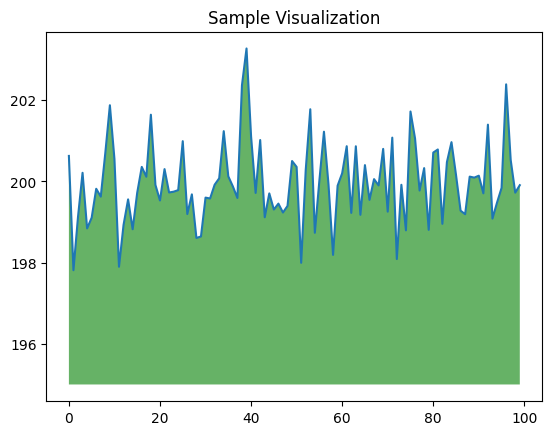

In [23]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()